# Building an Image Classifier Using the Sequential API

### Using Keras to load the dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.0-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

### Split into a training set and test set, and scale the input features

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

### Labels

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[0]]

'Coat'

### Creating the model using the Sequential API

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

### Summary of the model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Layers information

In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]

In [14]:
hidden1.name

'dense'

In [15]:
model.get_layer('dense') is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02307501, -0.01246028,  0.04788158, ..., -0.03677852,
         0.06117511,  0.01729409],
       [-0.00141763,  0.02519772, -0.00312635, ..., -0.07077061,
        -0.02759265,  0.03682721],
       [ 0.01817791, -0.01059179, -0.03670741, ...,  0.06626491,
        -0.06305983,  0.03103303],
       ...,
       [-0.04108401,  0.06545383, -0.05250171, ..., -0.0378261 ,
         0.00230724, -0.04615338],
       [-0.01294739, -0.05991235,  0.06716493, ...,  0.04154367,
        -0.06228869,  0.05277647],
       [ 0.06325909, -0.06965253, -0.06828006, ..., -0.06505468,
         0.07256815, -0.04901189]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

### Compiling the model

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training and evaluating the model

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7158 - accuracy: 0.7627 - val_loss: 0.5188 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4856 - accuracy: 0.8296 - val_loss: 0.4443 - val_accuracy: 0.8532
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4393 - accuracy: 0.8469 - val_loss: 0.4319 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4113 - accuracy: 0.8555 - val_loss: 0.3922 - val_accuracy: 0.8694
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3905 - accuracy: 0.8630 - val_loss: 0.3840 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3753 - accuracy: 0.8679 - val_loss: 0.3699 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3615 - accuracy: 0.8729 - val_loss: 0.3678 - val_accuracy:

### History training

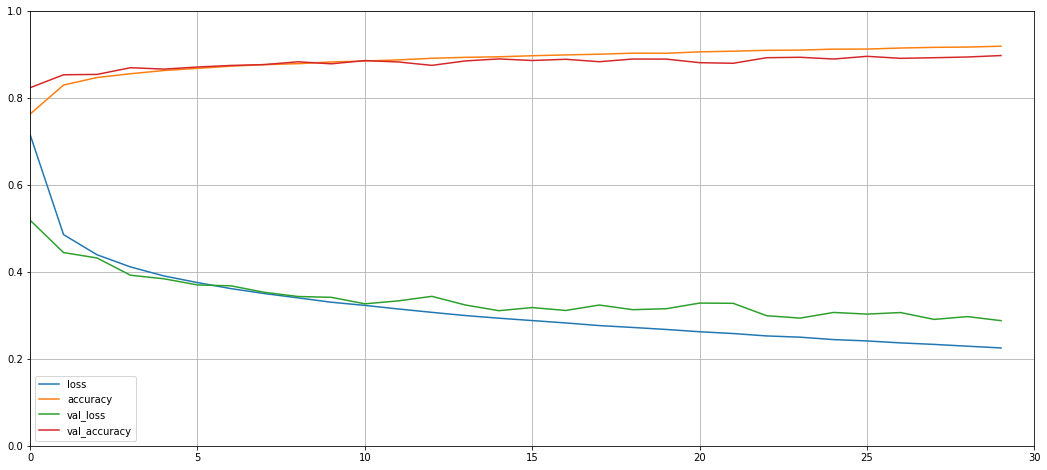

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(18, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.gca().set_xlim(0, 30)
plt.show()

### Evaluate model

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 756us/step - loss: 0.3227 - accuracy: 0.8870


[0.3226943910121918, 0.8870000243186951]

### Using the model to make predictions

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression MLP Using the Sequential API

### Preparing Data

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Buildding Sequential API

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 808us/step - loss: 0.9317 - val_loss: 0.4626
Epoch 2/20
363/363 [==============================] - 0s 704us/step - loss: 0.4588 - val_loss: 0.4036
Epoch 3/20
363/363 [==============================] - 0s 686us/step - loss: 0.4235 - val_loss: 0.3805
Epoch 4/20
363/363 [==============================] - 0s 701us/step - loss: 0.4032 - val_loss: 0.3901
Epoch 5/20
363/363 [==============================] - 0s 683us/step - loss: 0.4718 - val_loss: 0.3772
Epoch 6/20
363/363 [==============================] - 0s 711us/step - loss: 0.4013 - val_loss: 0.3876
Epoch 7/20
363/363 [==============================] - 0s 697us/step - loss: 0.3896 - val_loss: 0.3690
Epoch 8/20
363/363 [==============================] - 0s 702us/step - loss: 0.3898 - val_loss: 0.3689
Epoch 9/20
363/363 [==============================] - 0s 705us/step - loss: 0.3861 - val_loss: 0.3560
Epoch 10/20
363/363 [==============================] - 0s 698us/step - loss: 0.386

# Building Complex Models Using the Functional API

### Wide Deep neural network

In [31]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 881us/step - loss: 0.7628 - val_loss: 0.4662
Epoch 2/20
363/363 [==============================] - 0s 796us/step - loss: 0.4404 - val_loss: 0.4854
Epoch 3/20
363/363 [==============================] - 0s 788us/step - loss: 0.4017 - val_loss: 0.4087
Epoch 4/20
363/363 [==============================] - 0s 773us/step - loss: 0.3900 - val_loss: 0.3627
Epoch 5/20
363/363 [==============================] - 0s 761us/step - loss: 0.3670 - val_loss: 0.3587
Epoch 6/20
363/363 [==============================] - 0s 759us/step - loss: 0.3622 - val_loss: 0.3843
Epoch 7/20
363/363 [==============================] - 0s 754us/step - loss: 0.3571 - val_loss: 0.4208
Epoch 8/20
363/363 [==============================] - 0s 741us/step - loss: 0.3704 - val_loss: 0.3381
Epoch 9/20
363/363 [==============================] - 0s 748us/step - loss: 0.3517 - val_loss: 0.3537
Epoch 10/20
363/363 [==============================] - 0s 765us/step - loss: 0.349

### Handling multiple inputs

In [38]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 898us/step - loss: 2.3397 - val_loss: 0.9847
Epoch 2/20
363/363 [==============================] - 0s 796us/step - loss: 0.8032 - val_loss: 0.6698
Epoch 3/20
363/363 [==============================] - 0s 805us/step - loss: 0.6549 - val_loss: 0.5973
Epoch 4/20
363/363 [==============================] - 0s 799us/step - loss: 0.6008 - val_loss: 0.5550
Epoch 5/20
363/363 [==============================] - 0s 789us/step - loss: 0.5661 - val_loss: 0.5215
Epoch 6/20
363/363 [==============================] - 0s 796us/step - loss: 0.5389 - val_loss: 0.4983
Epoch 7/20
363/363 [==============================] - 0s 794us/step - loss: 0.5174 - val_loss: 0.4798
Epoch 8/20
363/363 [==============================] - 0s 784us/step - loss: 0.4993 - val_loss: 0.4647
Epoch 9/20
363/363 [==============================] - 0s 808us/step - loss: 0.4847 - val_loss: 0.4500
Epoch 10/20
363/363 [==============================] - 0s 794us/step - loss: 0.472

### Handling multiple outputs

In [41]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0346 - output_loss: 0.9539 - aux_output_loss: 1.7604 - val_loss: 0.5491 - val_output_loss: 0.4727 - val_aux_output_loss: 1.2375
Epoch 2/20
363/363 [==============================] - 0s 921us/step - loss: 0.5359 - output_loss: 0.4733 - aux_output_loss: 1.0990 - val_loss: 0.4650 - val_output_loss: 0.4100 - val_aux_output_loss: 0.9594
Epoch 3/20
363/363 [==============================] - 0s 940us/step - loss: 0.4735 - output_loss: 0.4263 - aux_output_loss: 0.8983 - val_loss: 0.4299 - val_output_loss: 0.3894 - val_aux_output_loss: 0.7945
Epoch 4/20
363/363 [==============================] - 0s 905us/step - loss: 0.4619 - output_loss: 0.4286 - aux_output_loss: 0.7619 - val_loss: 0.4157 - val_output_loss: 0.3846 - val_aux_output_loss: 0.6949
Epoch 5/20
363/363 [==============================] - 0s 906us/step - loss: 0.4279 - output_loss: 0.4005 - aux_output_loss: 0.6746 - val_loss: 0.3953 - val_output_loss: 0.3701 - 